## The goal of this notebook is to examine the performance of the newly-implemented PVD prevalence model and the newly-developped PVD incidence model.

In [1]:
import os
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
import matplotlib.pyplot as plt
import importlib.util

from microsim.population import NHANESDirectSamplePopulation

microsimDir = "/Users/deligkaris.1/OneDrive - The Ohio State University Wexner Medical Center/MICROSIM/CODE/microsim"
os.chdir(microsimDir)

In [2]:
popSize = 100000
pop = NHANESDirectSamplePopulation(popSize, 2017)

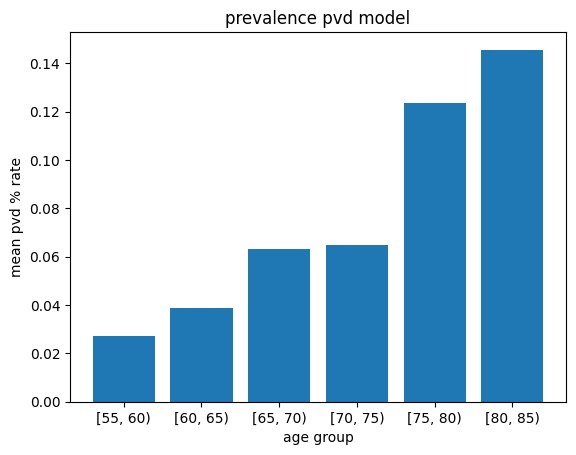

In [3]:
#do the bin counting for the baseline model
ageList = list()
pvdList = list()
for p in pop._people.iloc[:]:
    ageList +=  p._age
    pvdList += p._pvd 
        
basePvd = pd.DataFrame(list(zip(ageList,pvdList)), columns=["age","pvd"])
basePvd["age"]=basePvd["age"].astype('int')
basePvd["ageInterval"] = pd.cut(basePvd["age"], bins=[10,55,60,65,70,75,80,85,90,95,100],right=False)

basePvdMeansByAgeGroup = basePvd.groupby("ageInterval").agg({'pvd' : 'mean'})
basePvdMeansByAgeGroup["labels"] = [f"[{x.left}, {x.right})" for x in  basePvdMeansByAgeGroup.index.array]

labels = basePvdMeansByAgeGroup["labels"].values.tolist()[1:]
values = [x[0] for x in basePvdMeansByAgeGroup.values[1:]]

fig, ax = plt.subplots()
ax.bar(labels, values)
plt.xlabel("age group")
plt.ylabel("mean pvd % rate")
plt.title("prevalence pvd model")
plt.show()

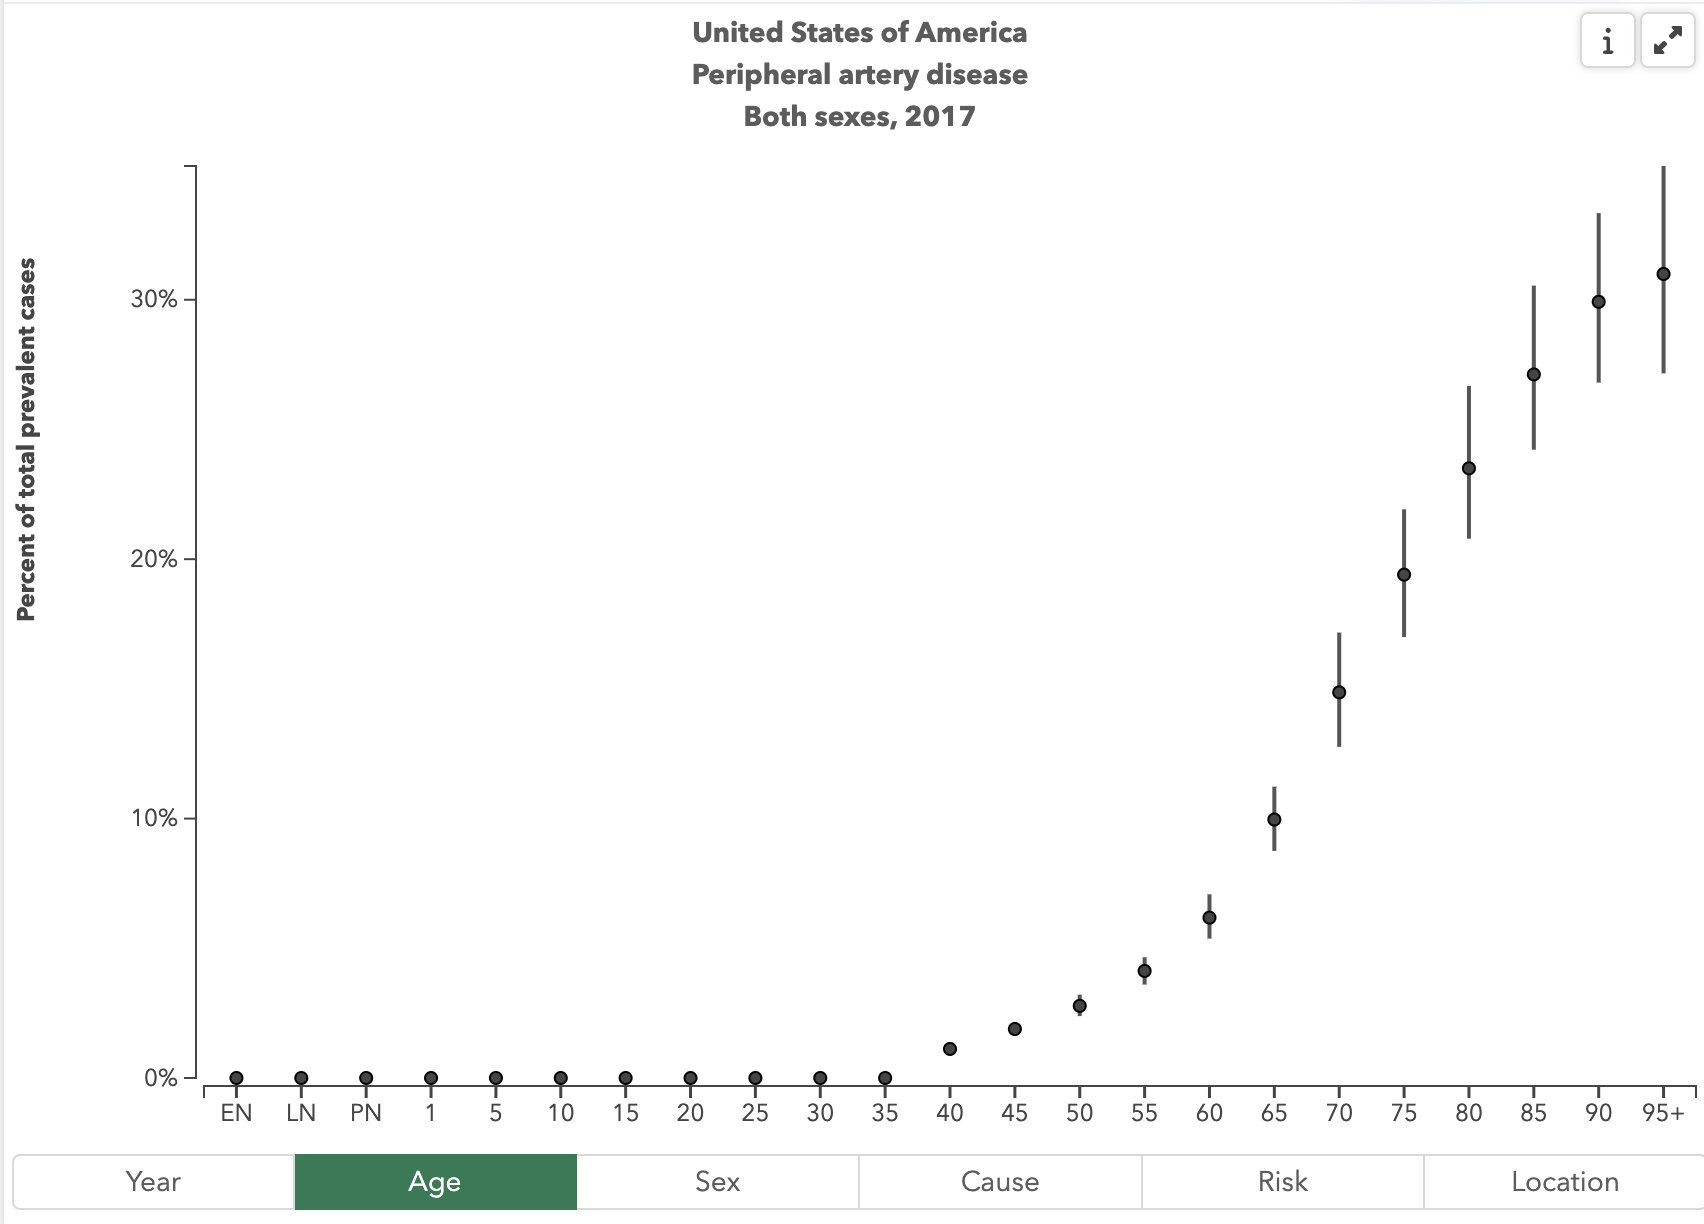

In [4]:
from microsim.gender import NHANESGender
( np.mean(list(map( lambda x: x._pvd[0], list(filter(lambda x: x._gender==NHANESGender.MALE, pop._people))))),
  np.mean(list(map( lambda x: x._pvd[0], list(filter(lambda x: x._gender==NHANESGender.FEMALE, pop._people))))),
  np.mean(list(map( lambda x: x._pvd[0], pop._people))) )

(0.025974563983595014, 0.03081860716909632, 0.02848)

In [5]:
#GBD percent of prevalent cases male: 3.45%, female: 4.18%, both 3.83%

In [6]:
%%time
pop.advance(150)

CPU times: user 1h 16min 55s, sys: 11.9 s, total: 1h 17min 7s
Wall time: 1h 17min 4s


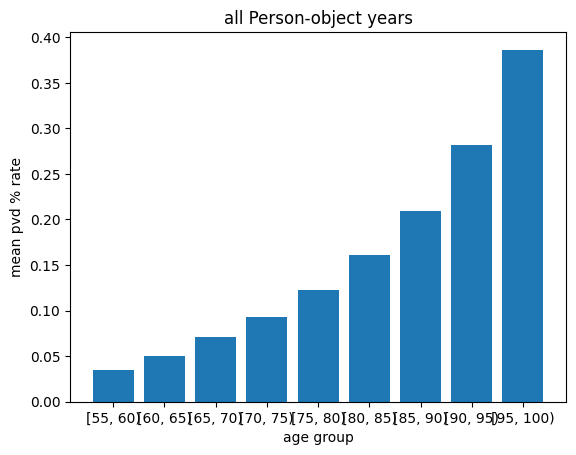

In [7]:
ageList = list()
pvdList = list()
for p in pop._people.iloc[:]:
    ageList +=  p._age
    pvdList += p._pvd 
        
basePvd = pd.DataFrame(list(zip(ageList,pvdList)), columns=["age","pvd"])
basePvd["age"]=basePvd["age"].astype('int')
basePvd["ageInterval"] = pd.cut(basePvd["age"], bins=[10,55,60,65,70,75,80,85,90,95,100],right=False)

basePvdMeansByAgeGroup = basePvd.groupby("ageInterval").agg({'pvd' : 'mean'})
basePvdMeansByAgeGroup["labels"] = [f"[{x.left}, {x.right})" for x in  basePvdMeansByAgeGroup.index.array]

labels = basePvdMeansByAgeGroup["labels"].values.tolist()[1:]
values = [x[0] for x in basePvdMeansByAgeGroup.values[1:]]

fig, ax = plt.subplots()
ax.bar(labels, values)
plt.xlabel("age group")
plt.ylabel("mean pvd % rate")
plt.title("all Person-object years")
plt.show()

In [8]:
malePVD = list(map( lambda x: x._pvd, list(filter(lambda x: x._gender==NHANESGender.MALE, pop._people))))
femalePVD = list(map( lambda x: x._pvd, list(filter(lambda x: x._gender==NHANESGender.FEMALE, pop._people))))

In [9]:
malePVD = [item for sublist in malePVD for item in sublist]
femalePVD = [item for sublist in femalePVD for item in sublist]

In [10]:
np.mean(malePVD), np.mean(femalePVD)

(0.08474943682972484, 0.07725880531903843)

In [11]:
wavePVD = list()
for p in pop._people:
    if p._pvd[-1]:
        wavePVD += [p._pvd.index(True)]

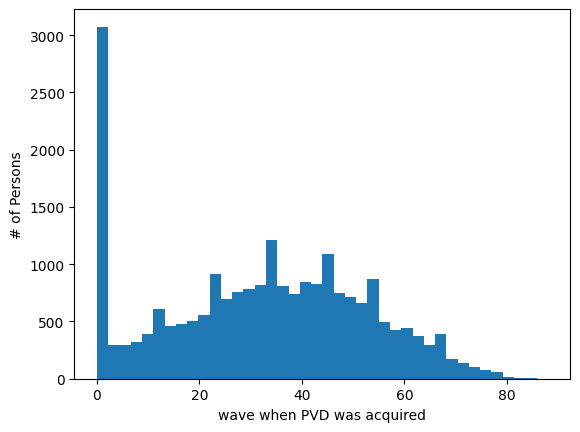

In [12]:
plt.hist(wavePVD, bins=40)
plt.xlabel("wave when PVD was acquired")
plt.ylabel("# of Persons")
plt.show()

In [13]:
incidencePVDAge = list()
for p in pop._people:
    if True in p._pvd:
        pvdIndex = p._pvd.index(True)
        if pvdIndex!=0:
            incidencePVDAge += [p._age[pvdIndex]]

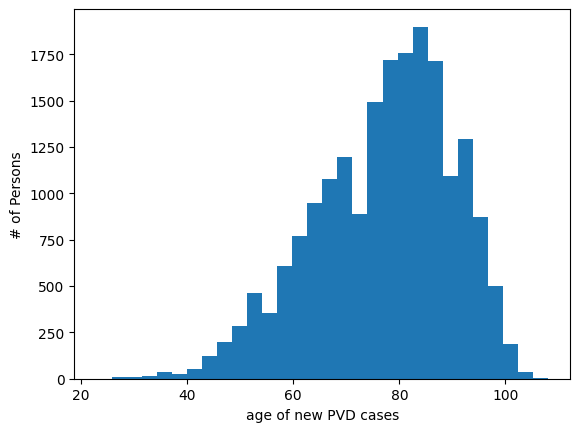

In [14]:
plt.hist(incidencePVDAge, bins=30)
plt.xlabel("age of new PVD cases")
plt.ylabel("# of Persons")
plt.show()

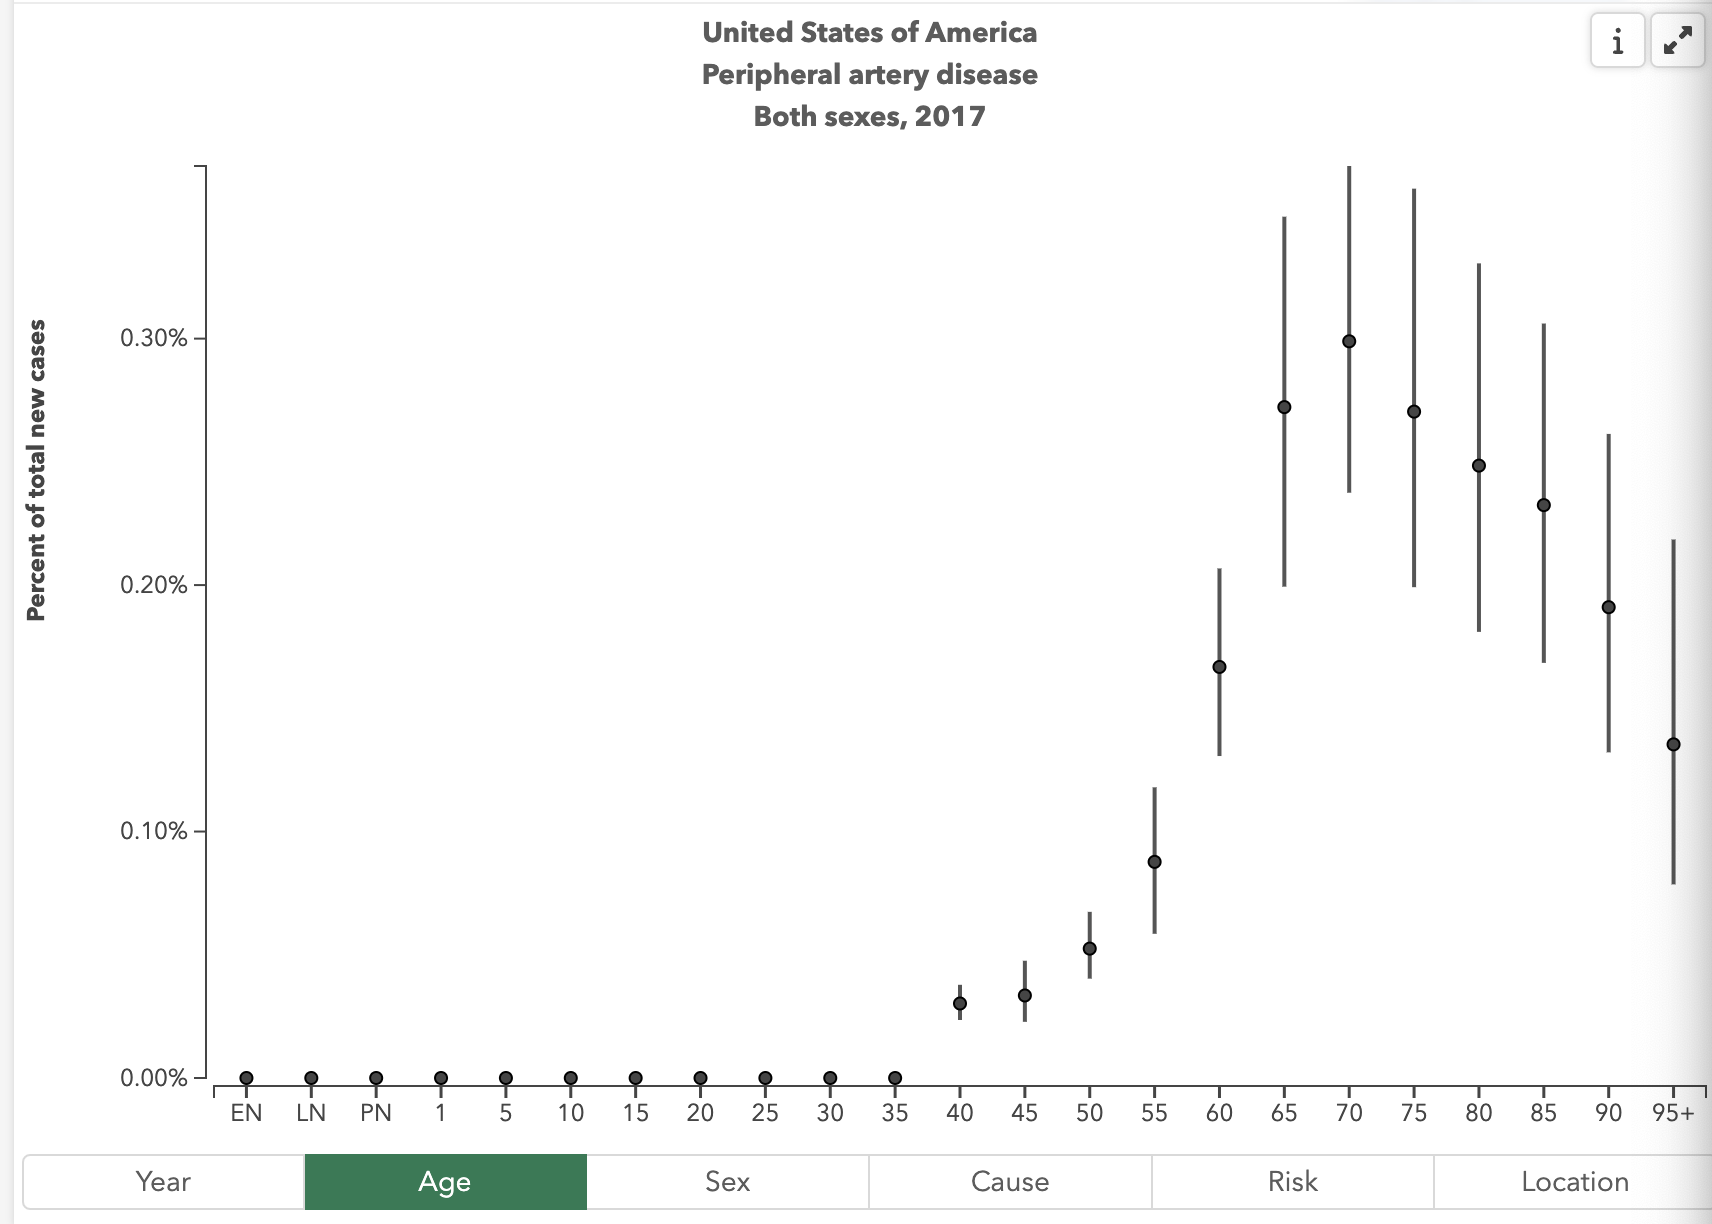